In [49]:
# Imports Packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [50]:
# Prepare the data
dfmyopia = pd.read_csv("myopia.csv")
dfmyopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [51]:
print(dfmyopia.dtypes)

# Drop Myopic column
dfmyopia = dfmyopia.drop(columns=["MYOPIC"])
dfmyopia.head(10)

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [52]:
for column in dfmyopia.columns:
    print(f"Column {column} has {dfmyopia[column].isnull().sum()} null values")

print(f"Duplicate entries: {dfmyopia.duplicated().sum()}")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Duplicate entries: 0


In [53]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfmyopia[['AGE',
                                              'SPHEQ',
                                              'AL',
                                              'ACD',
                                              'LT',
                                              'VCD',
                                              'SPORTHR',
                                              'READHR',
                                              'COMPHR',
                                              'STUDYHR',
                                              'TVHR',
                                              'DIOPTERHR',
                                              'MOMMY',
                                              'DADMY']])
dfmyopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [54]:
new_dfmyopia = pd.DataFrame(scaled_data, columns=dfmyopia.columns)

new_dfmyopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [55]:
#Apply Dimensionality Reduction
pca = PCA(n_components=2)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(new_dfmyopia)
myopia_pca

array([[ 0.53550271,  1.14500427],
       [-0.62470559, -1.57578643],
       [-0.93347937, -0.71707622],
       ...,
       [-0.89008202, -2.3080052 ],
       [-1.12399979,  0.45188978],
       [-0.69153391, -0.73704619]])

In [56]:
dfmyopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2"]
)
dfmyopia_pca.head()

,principal component 1,principal component 2
0,0.535503,1.145004
1,-0.624706,-1.575786
2,-0.933479,-0.717076
3,0.106354,1.192475
4,-0.388503,-2.839655


In [57]:
# Fetch the explained variance
pca.explained_variance_ratio_


array([0.21177355, 0.15659716])

In [58]:
#Perform a Cluster Analysis with K-means
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=2, random_state=5)

model.fit(dfmyopia)
predictions = model.predict(dfmyopia)
print(predictions)

[1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 

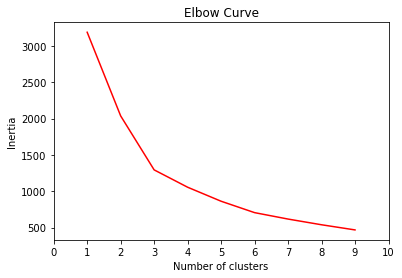

In [60]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dfmyopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
color = 'red'
plt.plot(df_elbow['k'], df_elbow['inertia'], color=color)
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendations

We iterate the values of k from 1 to 9 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range. To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.
